In [1]:
pwd

'/content'

In [2]:
cd drive/mydrive


[Errno 2] No such file or directory: 'drive/mydrive'
/content


In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive/Data_analysis/

/content/drive/MyDrive/Data_analysis


In [5]:
ls -l

total 35
-rw------- 1 root root 31525 Aug 11 07:57 '멕시코풍 프랜차이즈 chipotle의 주문데이터 분석하기.ipynb'
drwx------ 2 root root  4096 Aug 11 06:33  python-data-analysis/


In [6]:
import pandas as pd

file_path = './python-data-analysis/data/chipotle.tsv'
chipo = pd.read_csv(file_path,sep='\t')

print(chipo.shape)
print("--------------------------------------")
print(chipo.info())

(4622, 5)
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [7]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',-1)
print(chipo.head(10))

print(chipo.columns)
print("--------------------------------------")
print(chipo.index)
chipo.head(10)

   order_id  quantity                              item_name  \
0  1         1         Chips and Fresh Tomato Salsa            
1  1         1         Izze                                    
2  1         1         Nantucket Nectar                        
3  1         1         Chips and Tomatillo-Green Chili Salsa   
4  2         2         Chicken Bowl                            
5  3         1         Chicken Bowl                            
6  3         1         Side of Chips                           
7  4         1         Steak Burrito                           
8  4         1         Steak Soft Tacos                        
9  5         1         Steak Burrito                           

                                                                                                   choice_description  \
0  NaN                                                                                                                  
1  [Clementine]                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [8]:
#order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환 한다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())
3#만약 변경을 안했다면 Order_id에 대한 통계값이 나왔을 것이다. 

          quantity
count  4622.000000
mean   1.075725   
std    0.410186   
min    1.000000   
25%    1.000000   
50%    1.000000   
75%    1.000000   
max    15.000000  


관찰해서 볼수 있는것은 평균주문수량이 1.07이니까 한개의 메뉴에대해서 1개정도만 주문을 했다는 것이고 한사람이 같은 메뉴를 여러개 구매하는 경우가 많지 않다.


In [9]:
#item_price는 type이 object이기때문에 describe 함수로 기초 통계를 내릴수가 없다.
#그래서 데이터 전처리 작업이 필요 추후 공부 예정

print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))


1834
50


## 인사이트 발견: 탐색과 시각화 ##

In [10]:
#가장많이 주문한 아이템 Top10
"""
DataFrame['columns'] 의 형태에 value_counts()함수를 적용하는 방식을 사용한다. -> DataFrame['columns']은 시리즈 객체를 반환하는데 
value_counts는() 함수는 오직 시리즈 객제에만 적용되기 떄문 
"""
item_count = chipo['item_name'].value_counts()[:10]
#print(item_count)
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

chipo['item_name'].value_counts().index.tolist()[0]

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


'Chicken Bowl'

In [11]:
order_count = chipo.groupby('item_name')['order_id'].count()
print(order_count.shape)
order_count[:10] #아이템별 주문 개수를 확인한다

(50,)


item_name
6 Pack Soft Drink        54 
Barbacoa Bowl            66 
Barbacoa Burrito         91 
Barbacoa Crispy Tacos    11 
Barbacoa Salad Bowl      10 
Barbacoa Soft Tacos      25 
Bottled Water            162
Bowl                     2  
Burrito                  6  
Canned Soda              104
Name: order_id, dtype: int64

In [12]:
order_count = chipo.groupby('item_name')['quantity'].count()
print(order_count.shape)
order_count[:10] #아이템별 주문 총량을 확인한다. 

(50,)


item_name
6 Pack Soft Drink        54 
Barbacoa Bowl            66 
Barbacoa Burrito         91 
Barbacoa Crispy Tacos    11 
Barbacoa Salad Bowl      10 
Barbacoa Soft Tacos      25 
Bottled Water            162
Bowl                     2  
Burrito                  6  
Canned Soda              104
Name: quantity, dtype: int64

In [13]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(order_count.shape)
item_quantity[0:10]

(50,)


item_name
6 Pack Soft Drink        55 
Barbacoa Bowl            66 
Barbacoa Burrito         91 
Barbacoa Crispy Tacos    12 
Barbacoa Salad Bowl      10 
Barbacoa Soft Tacos      25 
Bottled Water            211
Bowl                     4  
Burrito                  6  
Canned Soda              126
Name: quantity, dtype: int64

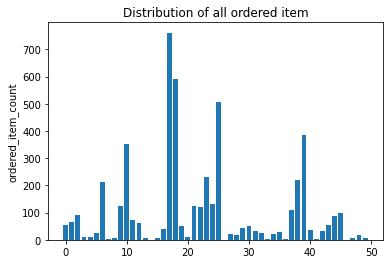

In [14]:
#시각화
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos,order_cnt,align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [17]:
#앞서 item_price의 수치적 특징을 탐색하는 과정에서 피처의 요약 통께를 구할수 가 없었다. item_price 가 문자 타입이 였기 때문이다.
print(chipo.info())
print('------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------


0    $2.39  
1    $3.39  
2    $3.39  
3    $2.39  
4    $16.98 
Name: item_price, dtype: object

In [18]:
#$에 대한 전처리를 진행해 준다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [19]:
#탐색적 분석: 다양한 질문 
#1.주문당 평균 계산금액은 얼마일까?
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

한개의 주문에서 평균 18달러를 계산한다. 

In [38]:
#2.한 주문당 15달러를 넘는 주문번호가 몇번일까?
chipo_ordered_group = chipo.groupby('order_id').sum()
#print(chipo_ordered_group) 
results = chipo_ordered_group[chipo_ordered_group.item_price >= 10]
#print(type(results))
results[:10]

print(results.index.values)
results[:10]

['1' '10' '100' ... '997' '998' '999']


,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
1002,2,10.68
1003,2,13.00
1004,2,21.96
1005,3,12.15


In [39]:
final_results = results.sort_values(by=['item_price','quantity'],ascending=True)
final_results[:10]

,quantity,item_price
order_id,,
100,2,10.08
1001,2,10.08
1014,2,10.08
1093,2,10.08
1122,2,10.08
113,2,10.08
1162,2,10.08
1186,2,10.08
1262,2,10.08


In [42]:
#각 아이템 가격 구하기 (유추)
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price",ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Guacamole]]",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Fajita Veggies, Cheese, Lettuce]]",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Cheese, Sour Cream]]",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Rice, Sour Cream, Cheese]]",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Lettuce]]",8.99


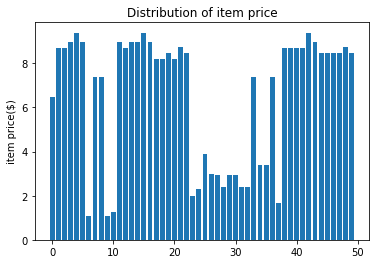

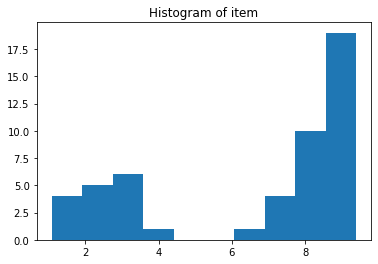

In [46]:
#메뉴 가격분포를 시각화 하는 작업
item_name_list = price_per_item.index.to_list()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].to_list()

plt.bar(x_pos,item_price,align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()


plt.hist(item_price)
plt.title('Histogram of item')
plt.show()

In [48]:
#가장 비싼 주문 아이템이 총 몇개 팔렸는지 구해보기
chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [53]:
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
# 'Veggie Salad Bowl이 몇번 주문 되었는지를 계산한다.

chipo_salad = chipo_salad.drop_duplicates(['item_name','order_id'])
#한 주문 내에서 집계된 item_name을 제거한다. 

#sort_value(by='order_id')
print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce, Guacamole, Sour Cream, Cheese, Black Beans, Rice]]",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Guacamole, Lettuce]]",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole, Fajita Vegetables, Cheese, Sour Cream, Black Beans]]",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


총 18번 주문 된것을 알 수 있다.

In [58]:
#'chicken Bowl' 을 2개이상 주문한 주문 횟수 구하기
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
chipo_chicken_result
print(chipo_chicken_result.shape[0])

33


1.가장 많이 주문된 아이템은 Chicken Bowl이다.

2.주문된 전체 아이템 종류는 50개 이다.

3.아이템당 주문된 총개수는 상위 8개에 몰려 있다.

4.주문당 평균 계산 금액은 18달러이다.

5.각 메뉴의 대략적인 가격은 2~4, 6~9 달러이다.
